In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [50]:
df = pd.read_csv("Placement_Data_Full_Class.csv")
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [51]:
df.shape

(215, 15)

In [52]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [53]:
# df[['status','salary']]

In [54]:
df[(df['status']=='Placed') & (pd.isna(df['salary']))]

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary


In [55]:
# df[(df['status']=='Not Placed') & (pd.isna(df['salary']))]

In [56]:
len(df[(df['status']=='Not Placed') & (pd.isna(df['salary']))])

67

In [57]:
df['salary'] = df['salary'].fillna(0)

In [58]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [59]:
columns = [ 'gender', 'ssc_b', 'hsc_b', 'hsc_s',
        'degree_t', 'workex',  'specialisation', 
       'status']
for col in columns:
    print(f"************{col}***************")
    print(df[col].unique())
    print("\n")

************gender***************
['M' 'F']


************ssc_b***************
['Others' 'Central']


************hsc_b***************
['Others' 'Central']


************hsc_s***************
['Commerce' 'Science' 'Arts']


************degree_t***************
['Sci&Tech' 'Comm&Mgmt' 'Others']


************workex***************
['No' 'Yes']


************specialisation***************
['Mkt&HR' 'Mkt&Fin']


************status***************
['Placed' 'Not Placed']




In [60]:
columns = [ 'gender', 'ssc_b', 'hsc_b', 'hsc_s',
        'degree_t', 'workex',  'specialisation', 
       'status']
for col in columns:
    print(f"************{col}***************")
    print(df[col].value_counts())
    print("\n")

************gender***************
gender
M    139
F     76
Name: count, dtype: int64


************ssc_b***************
ssc_b
Central    116
Others      99
Name: count, dtype: int64


************hsc_b***************
hsc_b
Others     131
Central     84
Name: count, dtype: int64


************hsc_s***************
hsc_s
Commerce    113
Science      91
Arts         11
Name: count, dtype: int64


************degree_t***************
degree_t
Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: count, dtype: int64


************workex***************
workex
No     141
Yes     74
Name: count, dtype: int64


************specialisation***************
specialisation
Mkt&Fin    120
Mkt&HR      95
Name: count, dtype: int64


************status***************
status
Placed        148
Not Placed     67
Name: count, dtype: int64




In [61]:
df.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

### but this is genuine outlier so we keep the outlier

ssc_p


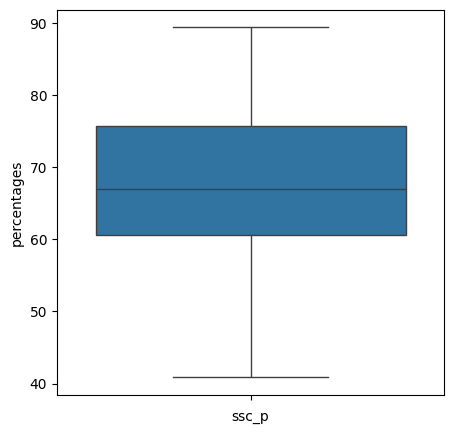

hsc_p


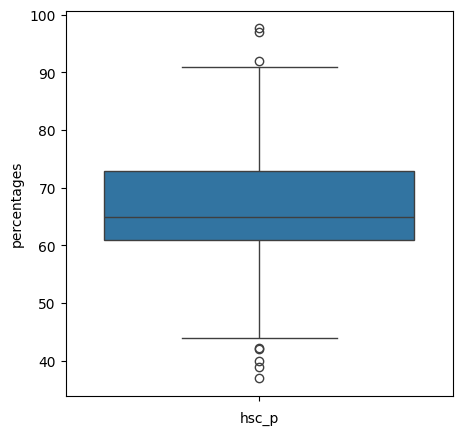

degree_p


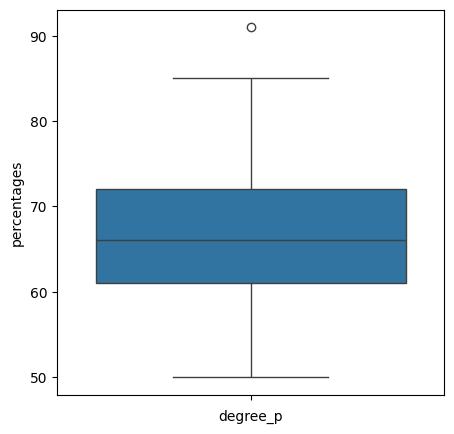

etest_p


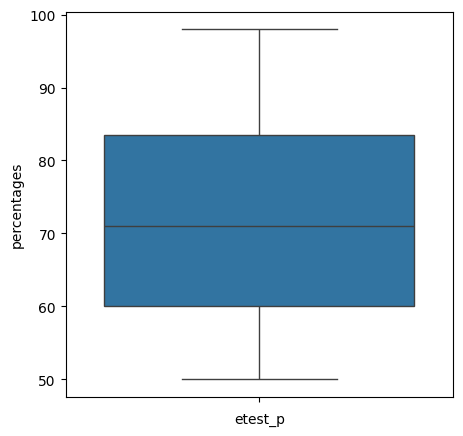

mba_p


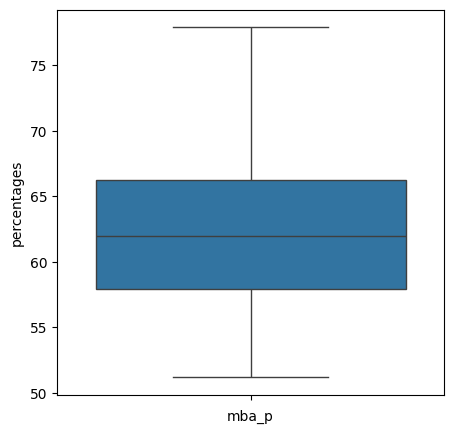

In [62]:
# detecting outliers
columns = ['ssc_p','hsc_p','degree_p','etest_p','mba_p']

for col in columns:
    print(col)
    plt.figure(figsize=(5,5))
    sns.boxplot(df[col])
    plt.ylabel('percentages')
    plt.xlabel(col)          
    plt.show()

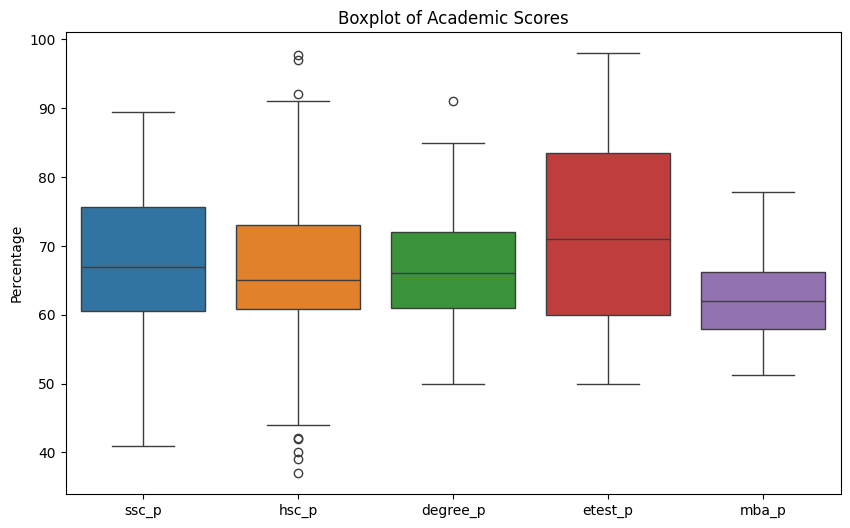

In [63]:
columns = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']

# Collect all the column data in a list
data = [df[col] for col in columns]

# Plot all boxplots in one figure
plt.figure(figsize=(10, 6))
sns.boxplot(data)

# Set custom x-axis labels
plt.xticks(range(0, len(columns) ), columns)

# Add title and labels if needed
plt.title('Boxplot of Academic Scores')
plt.ylabel('Percentage')

# Show the plot
plt.show()

In [64]:
# dealilng outlier using iqr method

q1 = df['hsc_p'].quantile(0.25)
q3 = df['hsc_p'].quantile(0.75)

iqr = q3 - q1

upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr



In [65]:
df[(df['hsc_p']>upper_limit) | (df['hsc_p']<lower_limit)]

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
24,25,M,76.50,Others,97.70,Others,Science,78.86,Sci&Tech,No,97.40,Mkt&Fin,74.01,Placed,360000.0
42,43,M,49.00,Others,39.00,Central,Science,65.00,Others,No,63.00,Mkt&Fin,51.21,Not Placed,0.0
49,50,F,50.00,Others,37.00,Others,Arts,52.00,Others,No,65.00,Mkt&HR,56.11,Not Placed,0.0
120,121,M,58.00,Others,40.00,Others,Science,59.00,Comm&Mgmt,No,73.00,Mkt&HR,58.81,Not Placed,0.0
134,135,F,77.44,Central,92.00,Others,Commerce,72.00,Comm&Mgmt,Yes,94.00,Mkt&Fin,67.13,Placed,250000.0
169,170,M,59.96,Others,42.16,Others,Science,61.26,Sci&Tech,No,54.48,Mkt&HR,65.48,Not Placed,0.0
177,178,F,73.00,Central,97.00,Others,Commerce,79.00,Comm&Mgmt,Yes,89.00,Mkt&Fin,70.81,Placed,650000.0
206,207,M,41.00,Central,42.00,Central,Science,60.00,Comm&Mgmt,No,97.00,Mkt&Fin,53.39,Not Placed,0.0


In [66]:
df_cleaned = df[(df['hsc_p']<upper_limit) & (df['hsc_p']>lower_limit)]

In [67]:
df_cleaned.shape ,df.shape

((207, 15), (215, 15))

### train test split

In [68]:
df.drop(columns=['sl_no'],inplace=True)

In [69]:
X = df.drop(columns=['salary'])
y = df['salary']

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [71]:
X_train.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
93,M,52.0,Central,62.0,Central,Commerce,54.0,Comm&Mgmt,No,72.00,Mkt&HR,55.41,Not Placed
84,M,70.0,Central,63.0,Others,Science,70.0,Sci&Tech,Yes,55.00,Mkt&Fin,62.00,Placed
95,M,73.0,Central,78.0,Others,Commerce,65.0,Comm&Mgmt,Yes,95.46,Mkt&Fin,62.16,Placed
137,M,67.0,Others,63.0,Central,Commerce,72.0,Comm&Mgmt,No,56.00,Mkt&HR,60.41,Placed
210,M,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.00,Mkt&Fin,74.49,Placed


### Column Transformer

In [72]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

onehot = OneHotEncoder(drop='first')
onehot_columns = [ 'gender','ssc_b','hsc_b','hsc_s','degree_t','specialisation']

ordinal1 = OrdinalEncoder(categories=[['No','Yes']])
ordinal2 = OrdinalEncoder(categories=[['Not Placed','Placed']])

scalar = StandardScaler()
numerical_columns = X.select_dtypes(exclude='object').columns

pipeline = ColumnTransformer(
    [
        ('one hot encoding',onehot,onehot_columns),
        ('ordinal 1',ordinal1,['workex']),
        ('ordinal 2',ordinal2,['status']),
        ('scaling',scalar,numerical_columns)
    ],
    remainder = 'passthrough',verbose=True)

In [73]:
X_train = pipeline.fit_transform(X_train)

[ColumnTransformer]  (1 of 4) Processing one hot encoding, total=   0.0s
[ColumnTransformer] ..... (2 of 4) Processing ordinal 1, total=   0.0s
[ColumnTransformer] ..... (3 of 4) Processing ordinal 2, total=   0.0s
[ColumnTransformer] ....... (4 of 4) Processing scaling, total=   0.0s


In [74]:
X_test = pipeline.transform(X_test)

### One hot encoding

In [75]:
# columns=[ 'gender','ssc_b','hsc_b','hsc_s','degree_t','specialisation']

# from sklearn.preprocessing import OneHotEncoder

# encoder = OneHotEncoder(handle_unknown='ignore')

# for col in columns:
#     encoded = encoder.fit_transform(X_train[[col]]).toarray()
#     df_encoded = pd.DataFrame(encoded,columns=encoder.get_feature_names_out())
#     X_train.reset_index(drop=True,inplace=True)
#     X_train = pd.concat([X_train,df_encoded],axis=1)

#     encoded = encoder.transform(X_test[[col]]).toarray()
#     df_encoded = pd.DataFrame(encoded,columns=encoder.get_feature_names_out())
#     X_test.reset_index(drop=True,inplace=True)
#     X_test = pd.concat([X_test,df_encoded],axis=1)

In [76]:
# X_train = X_train.drop(columns=[ 'gender','ssc_b','hsc_b','hsc_s','degree_t','specialisation'])
# X_test = X_test.drop(columns=[ 'gender','ssc_b','hsc_b','hsc_s','degree_t','specialisation'])

In [77]:
# X_test.head()

### Ordinal encoding

In [78]:
# from sklearn.preprocessing import OrdinalEncoder

# ordinal = OrdinalEncoder(categories=[['No','Yes']])

# X_train['workex'] = ordinal.fit_transform(X_train[['workex']])
# X_test['workex'] = ordinal.transform(X_test[['workex']])

In [79]:
# X_test.head()

In [80]:
# from sklearn.preprocessing import OrdinalEncoder

# ordinal = OrdinalEncoder(categories=[['Not Placed','Placed']])

# X_train['status'] = ordinal.fit_transform(X_train[['status']])
# X_test['status'] = ordinal.transform(X_test[['status']])

In [81]:
# X_train.head()

In [82]:
# X_train.dtypes

### Linear Regression

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model  = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
score = r2_score(y_test,y_pred)
score

0.7201858259203173

In [85]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [87]:
# create a function to evaluate the model

def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mse)
    r2score = r2_score(true,predicted)
    return mae,rmse,r2score

In [88]:
# begining the model training

models = {
    "Linear Regression" :LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
     "K Neighbors Regressor" : KNeighborsRegressor(),
    "Decision Tree Regressor" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(),
    "Ada Boost Regressor" : AdaBoostRegressor(),
    "Gradient Boosting Regressor" : GradientBoostingRegressor()
}

In [91]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train,y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])

    print('Model performance for training set')
    print('- Root Mean Squared Error: {:.4f}'.format(model_train_rmse))
    print('- Mean Absolute Error: {:.4f}'.format(model_train_mae))
    print('- R2 Score: {:.4f}'.format(model_train_r2))

    print('-----------------------------------')

    print('Model performance for test set')
    print('- Root Mean Squared Error: {:.4f}'.format(model_test_rmse))
    print('- Mean Absolute Error: {:.4f}'.format(model_test_mae))
    print('- R2 Score: {:.4f}'.format(model_test_r2))

    print('+'*35)
    print("\n")

Linear Regression
Model performance for training set
- Root Mean Squared Error: 72343.4708
- Mean Absolute Error: 41989.2833
- R2 Score: 0.7845
-----------------------------------
Model performance for test set
- Root Mean Squared Error: 78555.4141
- Mean Absolute Error: 45529.3655
- R2 Score: 0.7202
+++++++++++++++++++++++++++++++++++


Lasso
Model performance for training set
- Root Mean Squared Error: 72343.4726
- Mean Absolute Error: 41984.9613
- R2 Score: 0.7845
-----------------------------------
Model performance for test set
- Root Mean Squared Error: 78552.6754
- Mean Absolute Error: 45523.7794
- R2 Score: 0.7202
+++++++++++++++++++++++++++++++++++


Ridge
Model performance for training set
- Root Mean Squared Error: 72591.8065
- Mean Absolute Error: 40805.2821
- R2 Score: 0.7830
-----------------------------------
Model performance for test set
- Root Mean Squared Error: 78016.0680
- Mean Absolute Error: 43594.3579
- R2 Score: 0.7240
+++++++++++++++++++++++++++++++++++


K Ne

### hyper parameter tuning

In [92]:
knn_params = {'n_neighbors':[2,3,10,20,40,50]}
rf_params = { 'n_estimators' :[100,200,50,400],
             'max_depth' : [5,8,15,None,10],
             'max_features':[5,7,'auto',8],
             'min_samples_split' :[2,8,15,20]
            }
ada_params = {
    'n_estimators' :[50,60,70,80]
}
             

In [93]:
randomcv_models = [
        ('KNN',KNeighborsRegressor(),knn_params),
    ('RF',RandomForestRegressor(),rf_params),
]

In [97]:
from sklearn.model_selection import RandomizedSearchCV

model_param ={}
for name,model,params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,param_distributions=params,n_iter=100,cv=3,verbose=0,n_jobs=1)

    random.fit(X_train,y_train)
    model_param[name] = random.best_params_


for model_name in model_param:
    print(f'------------Best param for {model_name}---------')
    print(model_param[model_name])

------------Best param for KNN---------
{'n_neighbors': 10}
------------Best param for RF---------
{'n_estimators': 100, 'min_samples_split': 20, 'max_features': 8, 'max_depth': 5}


In [96]:
## retraining model with best parameter

models = {
    "Random forest regressor":RandomForestRegressor(n_estimators= 100, min_samples_split= 20, max_features= 8, max_depth= 5),
    "K neighbour " : KNeighborsRegressor(n_neighbors= 10)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train,y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])

    print('Model performance for training set')
    print('- Root Mean Squared Error: {:.4f}'.format(model_train_rmse))
    print('- Mean Absolute Error: {:.4f}'.format(model_train_mae))
    print('- R2 Score: {:.4f}'.format(model_train_r2))

    print('-----------------------------------')

    print('Model performance for test set')
    print('- Root Mean Squared Error: {:.4f}'.format(model_test_rmse))
    print('- Mean Absolute Error: {:.4f}'.format(model_test_mae))
    print('- R2 Score: {:.4f}'.format(model_test_r2))

    print('+'*35)
    print("\n")    

Random forest regressor
Model performance for training set
- Root Mean Squared Error: 61988.2904
- Mean Absolute Error: 33271.9799
- R2 Score: 0.8418
-----------------------------------
Model performance for test set
- Root Mean Squared Error: 79768.4674
- Mean Absolute Error: 42614.0108
- R2 Score: 0.7115
+++++++++++++++++++++++++++++++++++


K neighbour 
Model performance for training set
- Root Mean Squared Error: 98997.9040
- Mean Absolute Error: 63988.3721
- R2 Score: 0.5964
-----------------------------------
Model performance for test set
- Root Mean Squared Error: 119715.9875
- Mean Absolute Error: 80437.2093
- R2 Score: 0.3501
+++++++++++++++++++++++++++++++++++




## Classification

In [36]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [37]:
X = df.drop(columns=['status','salary'])
y = df[['status']]

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder,StandardScaler

one_hot = OneHotEncoder(drop='first')
onehot_columns = [ 'gender','ssc_b','hsc_b','hsc_s','degree_t','specialisation']

ordinal1 = OrdinalEncoder(categories=[['No','Yes']])

label = LabelEncoder()

scalar = StandardScaler()
numerical_columns = X.select_dtypes(exclude='object').columns

pipeline = ColumnTransformer(
    [
        ('onehot encoding',one_hot,onehot_columns),
        ('ordinal 1',ordinal1,['workex']),
        ('scaling',scalar,numerical_columns)
    ],
    remainder='passthrough',verbose=True)

pipeline2 = ColumnTransformer(
    [
        ('label encoding',label,['status'])
    ],
    remainder='passthrough',verbose=True)

In [40]:
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

[ColumnTransformer]  (1 of 3) Processing onehot encoding, total=   0.0s
[ColumnTransformer] ..... (2 of 3) Processing ordinal 1, total=   0.0s
[ColumnTransformer] ....... (3 of 3) Processing scaling, total=   0.0s


In [41]:
y_train = pipeline2.fit_transform(y_train)
y_test = pipeline2.transform(y_test)

TypeError: LabelEncoder.fit_transform() takes 2 positional arguments but 3 were given

In [42]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

y_train = label.fit_transform(y_train)
y_test = label.transform(y_test)

## logistic regression

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logistic = LogisticRegression()
logistic.fit(X_train,y_train)
y_pred = logistic.predict(X_test)
score = accuracy_score(y_test,y_pred)
score

0.8837209302325582

In [45]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc = SVC()
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
score = accuracy_score(y_test,y_pred)
score

0.7906976744186046

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
score = accuracy_score(y_test,y_pred)
score

0.8372093023255814

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
score = accuracy_score(y_test,y_pred)
score

0.7674418604651163